# Objectifs

* Fournir une segmentation des clients que le Marketing pourra utiliser au quotidien pour leurs campagnes de communication.
* Comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.
* Fournir à l’équipe Marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale.
* Fournir une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.


# Informations complémentaire 

* Seuls 3 % des clients du fichier de données ont réalisé plusieurs commandes

# Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import missingno as msno
import pickle

# Data

In [2]:
data_customers = pd.read_csv('olist_customers_dataset.csv')
data_geolocation = pd.read_csv('olist_geolocation_dataset.csv') 
data_order_items = pd.read_csv('olist_order_items_dataset.csv')
data_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
data_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
data_orders = pd.read_csv('olist_orders_dataset.csv')
data_products = pd.read_csv('olist_products_dataset.csv')
data_sellers = pd.read_csv('olist_sellers_dataset.csv')
data_product_category_name = pd.read_csv('product_category_name_translation.csv')

In [3]:
# Liste de vos ensembles de données avec des noms correspondants
datasets = [
    ("Customers", data_customers),
    ("Geolocation", data_geolocation),
    ("Order Items", data_order_items),
    ("Order Payments", data_order_payments),
    ("Order Reviews", data_order_reviews),
    ("Orders", data_orders),
    ("Products", data_products),
    ("Sellers", data_sellers),
    ("Product Category Name", data_product_category_name)
]

In [4]:
features = []

In [5]:
# Afficher les dimensions de chaque DataFrame
print("Dimensions de data_customers :", data_customers.shape)
print("Dimensions de data_geolocation :", data_geolocation.shape)
print("Dimensions de data_order_items :", data_order_items.shape)
print("Dimensions de data_order_payments :", data_order_payments.shape)
print("Dimensions de data_order_reviews :", data_order_reviews.shape)
print("Dimensions de data_orders :", data_orders.shape)
print("Dimensions de data_products :", data_products.shape)
print("Dimensions de data_sellers :", data_sellers.shape)
print("Dimensions de data_product_category_name :", data_product_category_name.shape)

Dimensions de data_customers : (99441, 5)
Dimensions de data_geolocation : (1000163, 5)
Dimensions de data_order_items : (112650, 7)
Dimensions de data_order_payments : (103886, 5)
Dimensions de data_order_reviews : (99224, 7)
Dimensions de data_orders : (99441, 8)
Dimensions de data_products : (32951, 9)
Dimensions de data_sellers : (3095, 4)
Dimensions de data_product_category_name : (71, 2)


 ****** DATASET : Customers ******
SHAPE (99441, 5)
INFO <bound method DataFrame.info of                             customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19b

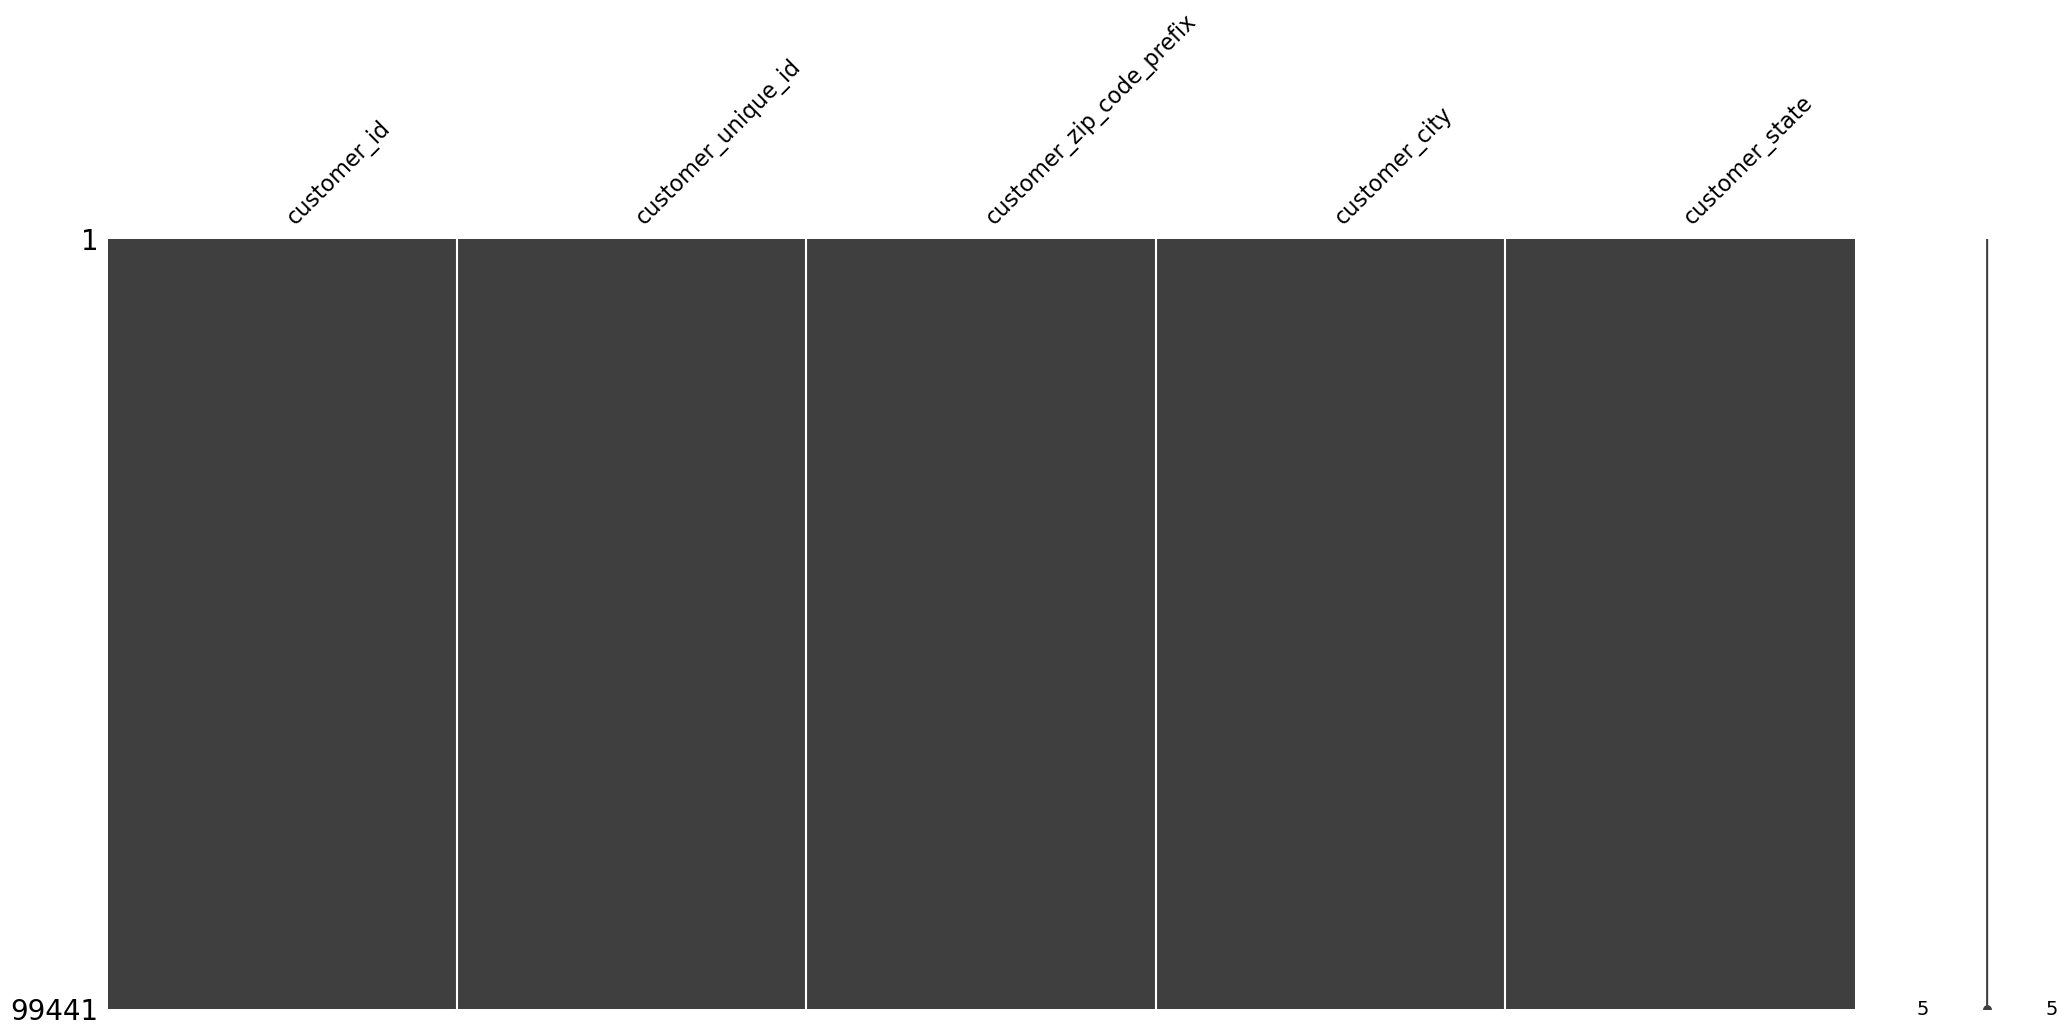

 ****** DATASET : Geolocation ******
SHAPE (1000163, 5)
INFO <bound method DataFrame.info of          geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocatio

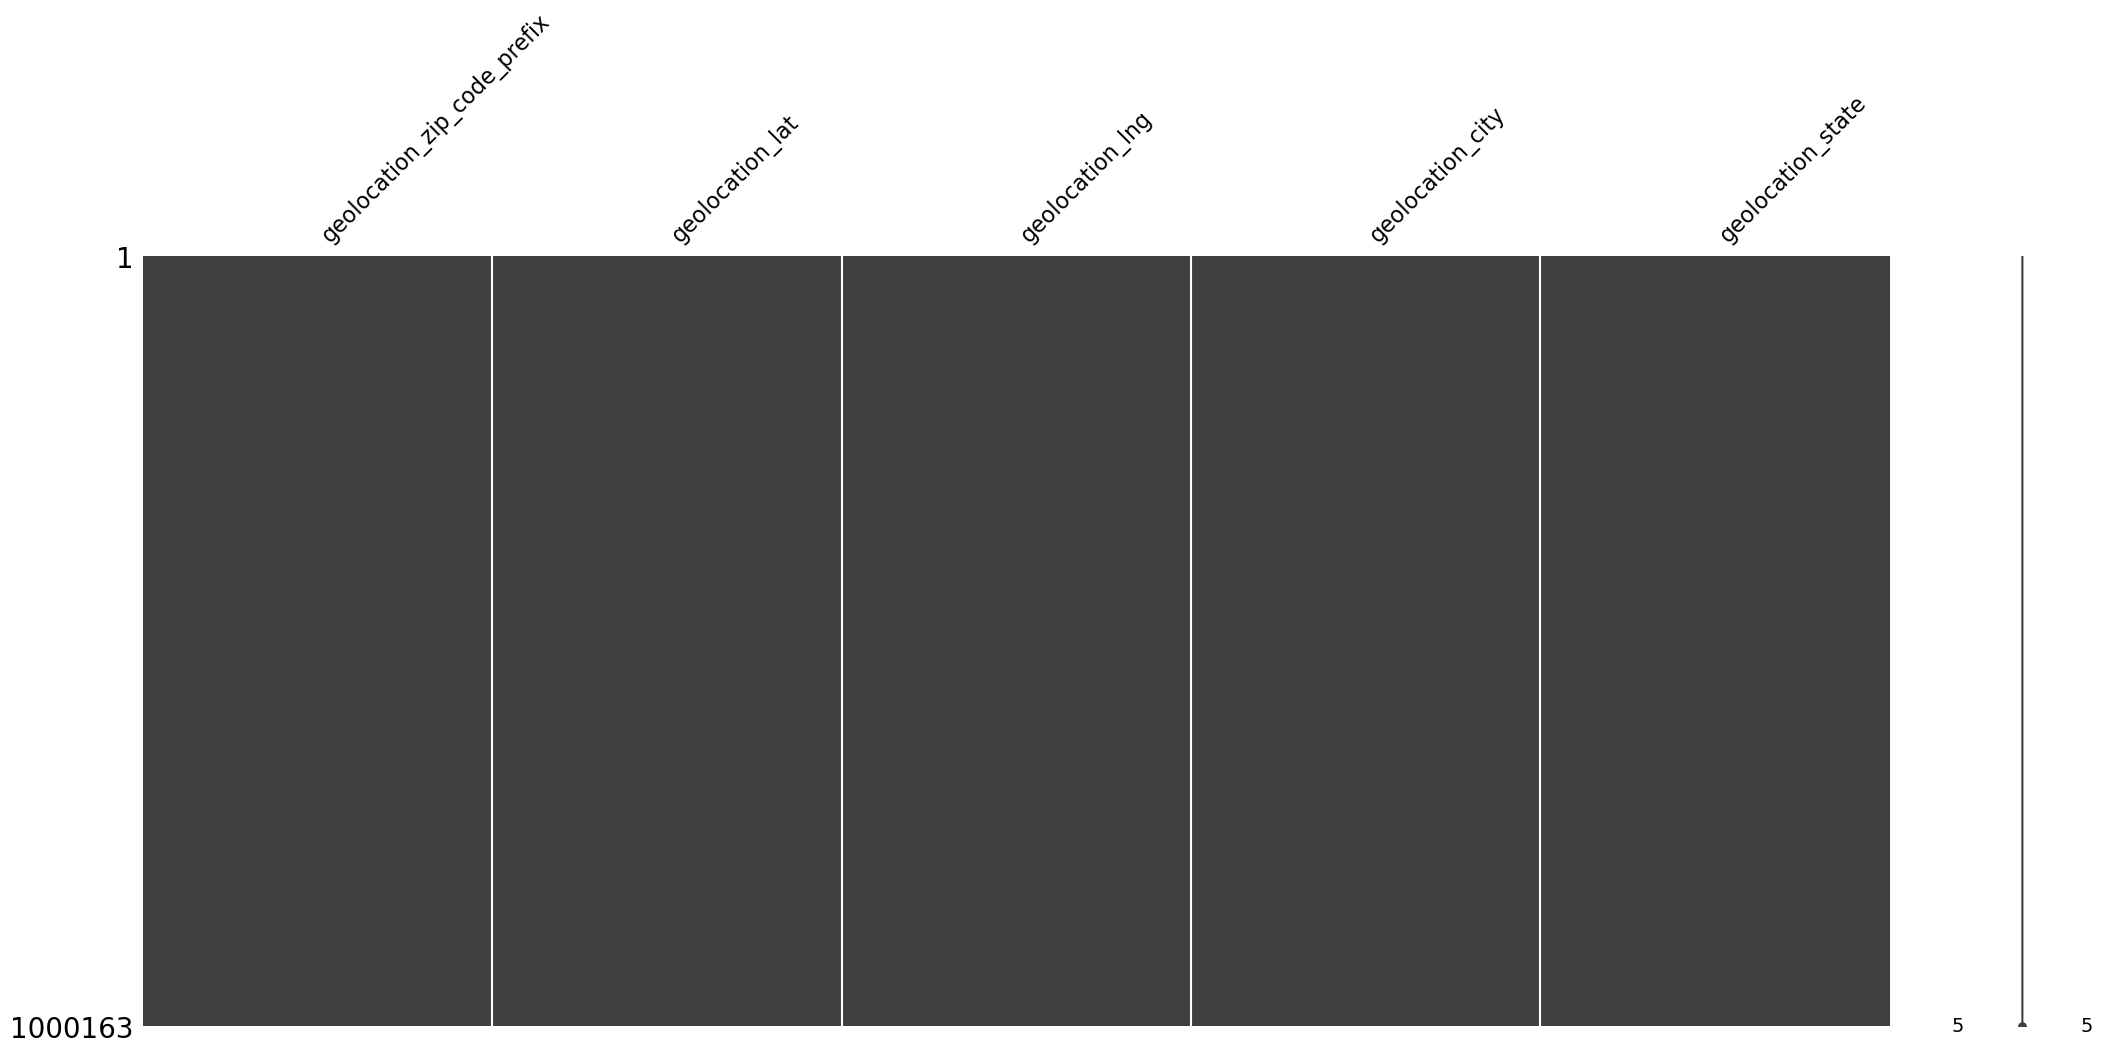

 ****** DATASET : Order Items ******
SHAPE (112650, 7)
INFO <bound method DataFrame.info of                                 order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  d

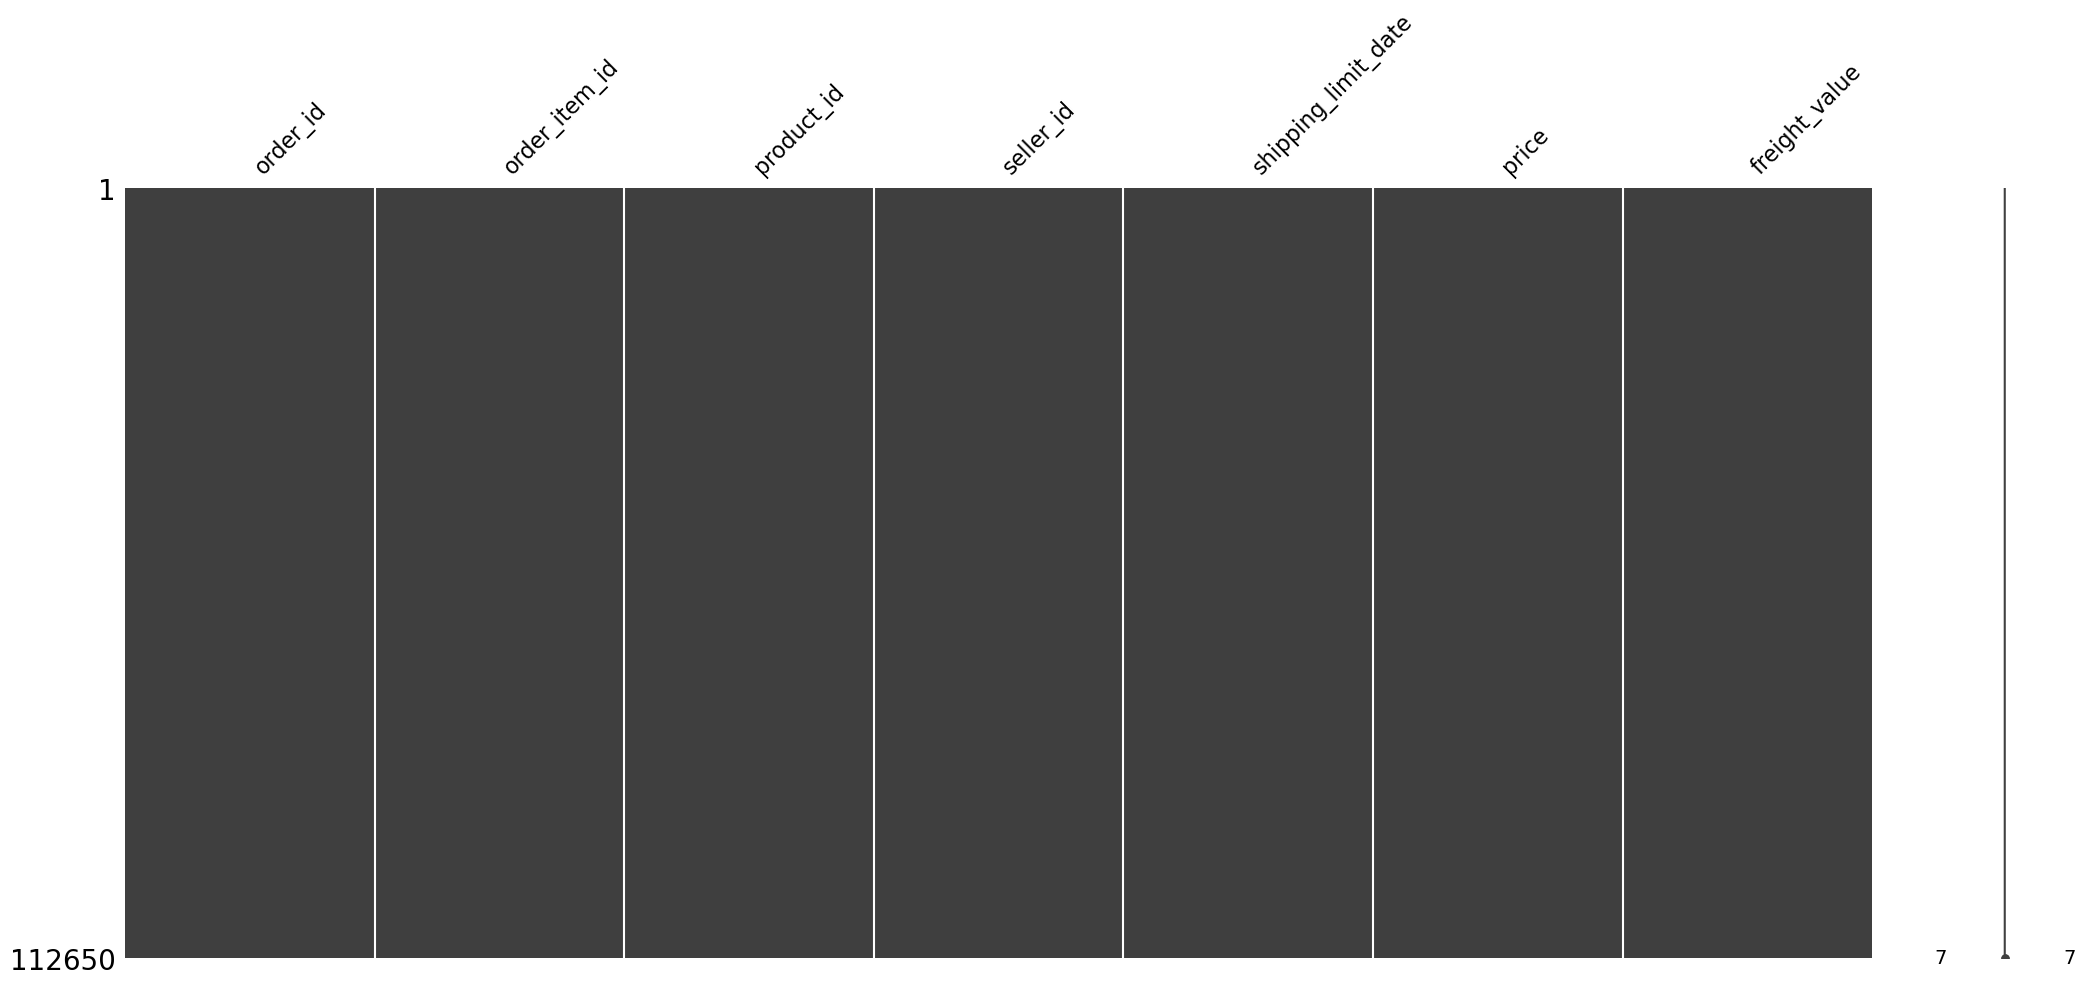

 ****** DATASET : Order Payments ******
SHAPE (103886, 5)
INFO <bound method DataFrame.info of                                 order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                  

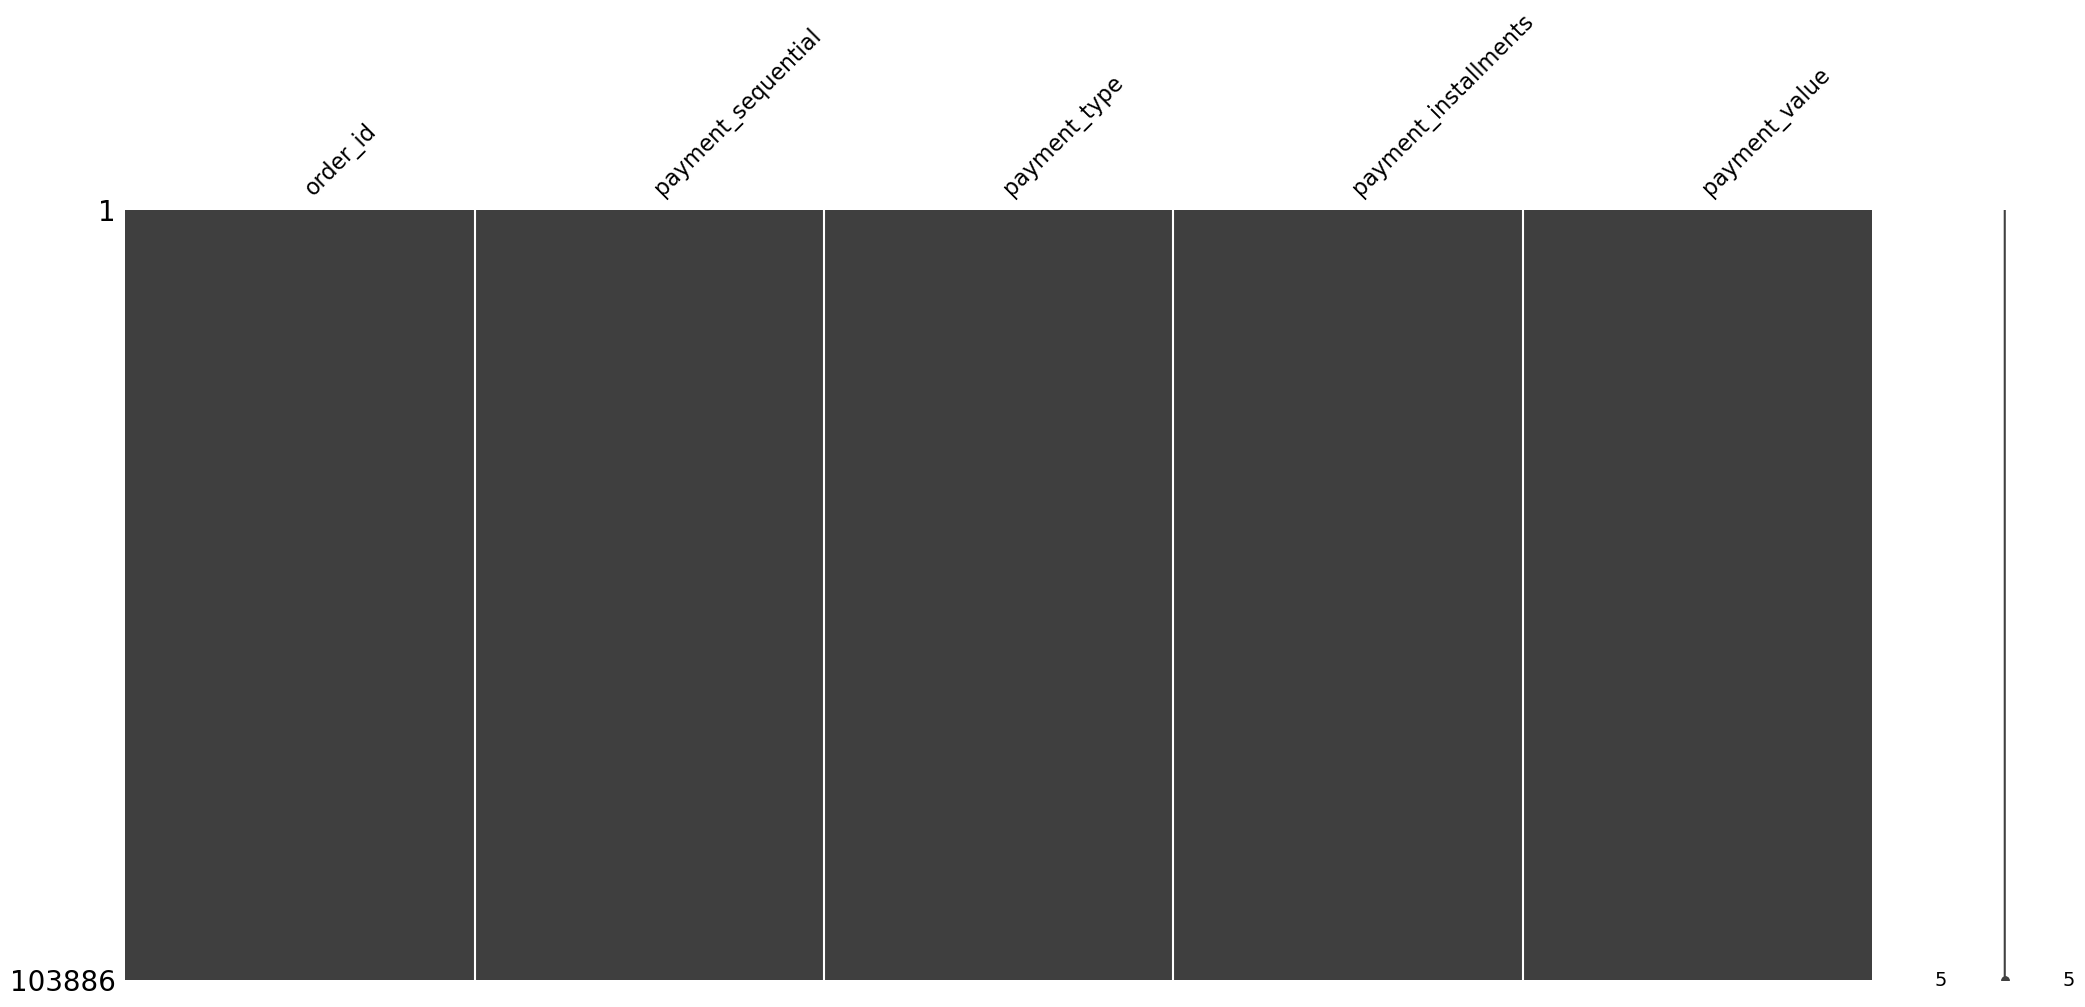

 ****** DATASET : Order Reviews ******
SHAPE (99224, 7)
INFO <bound method DataFrame.info of                               review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1f

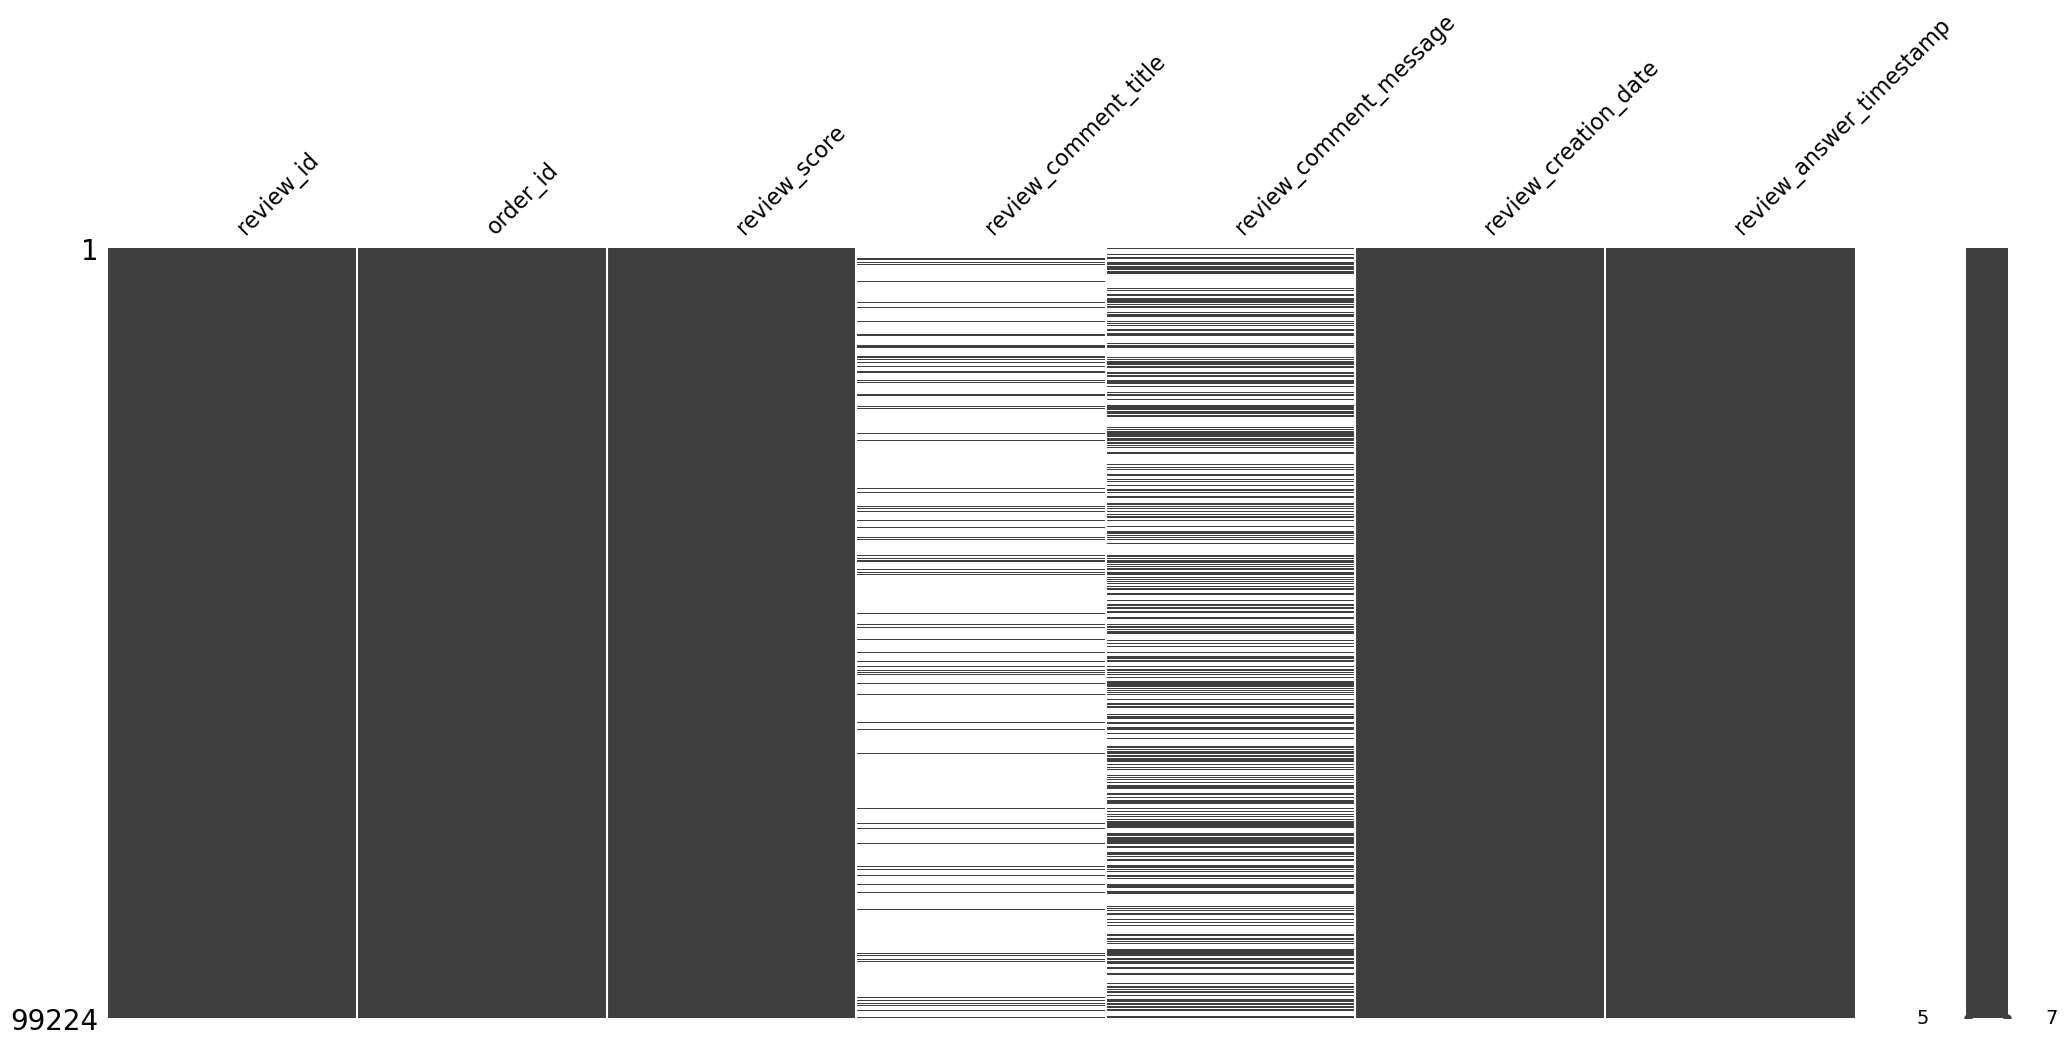

 ****** DATASET : Orders ******
SHAPE (99441, 8)
INFO <bound method DataFrame.info of                                order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211a

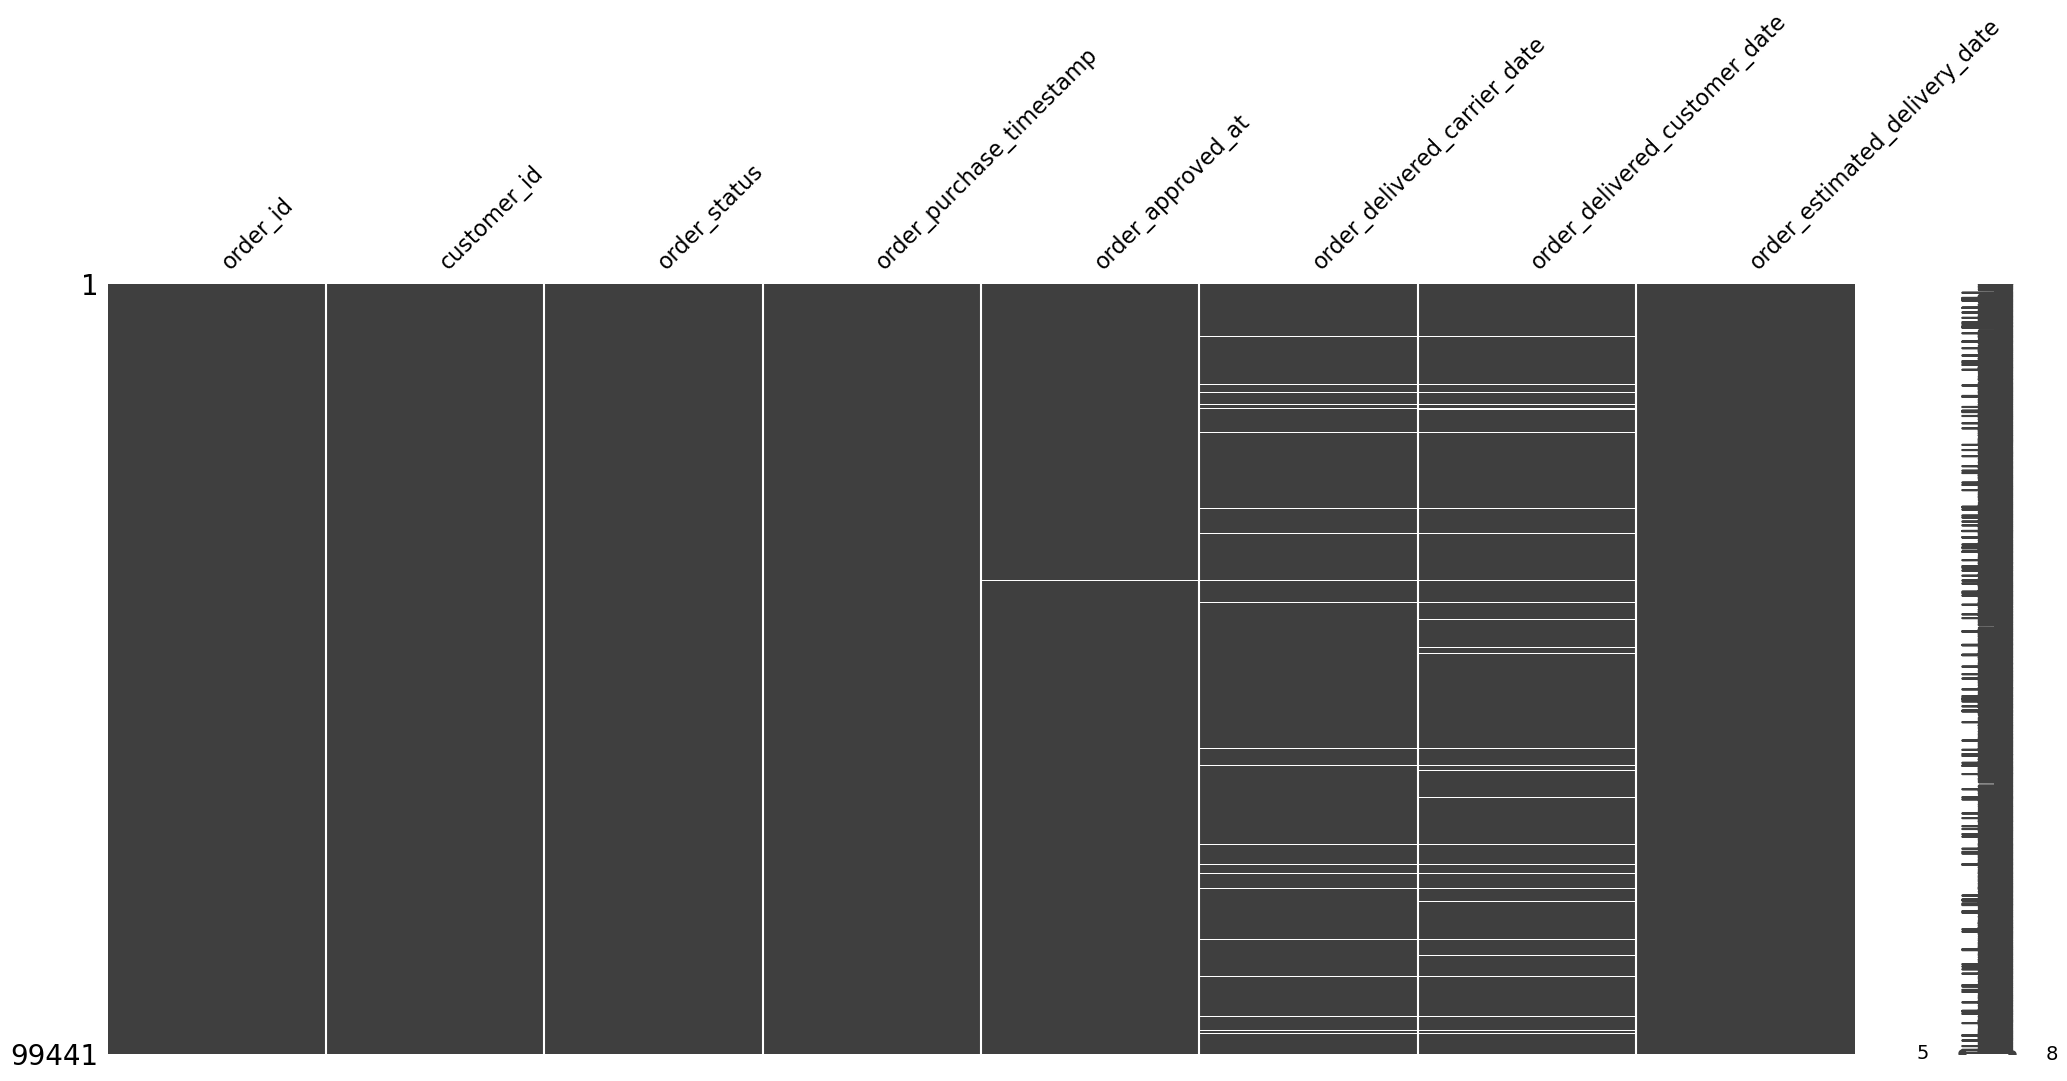

 ****** DATASET : Products ******
SHAPE (32951, 9)
INFO <bound method DataFrame.info of                              product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4               

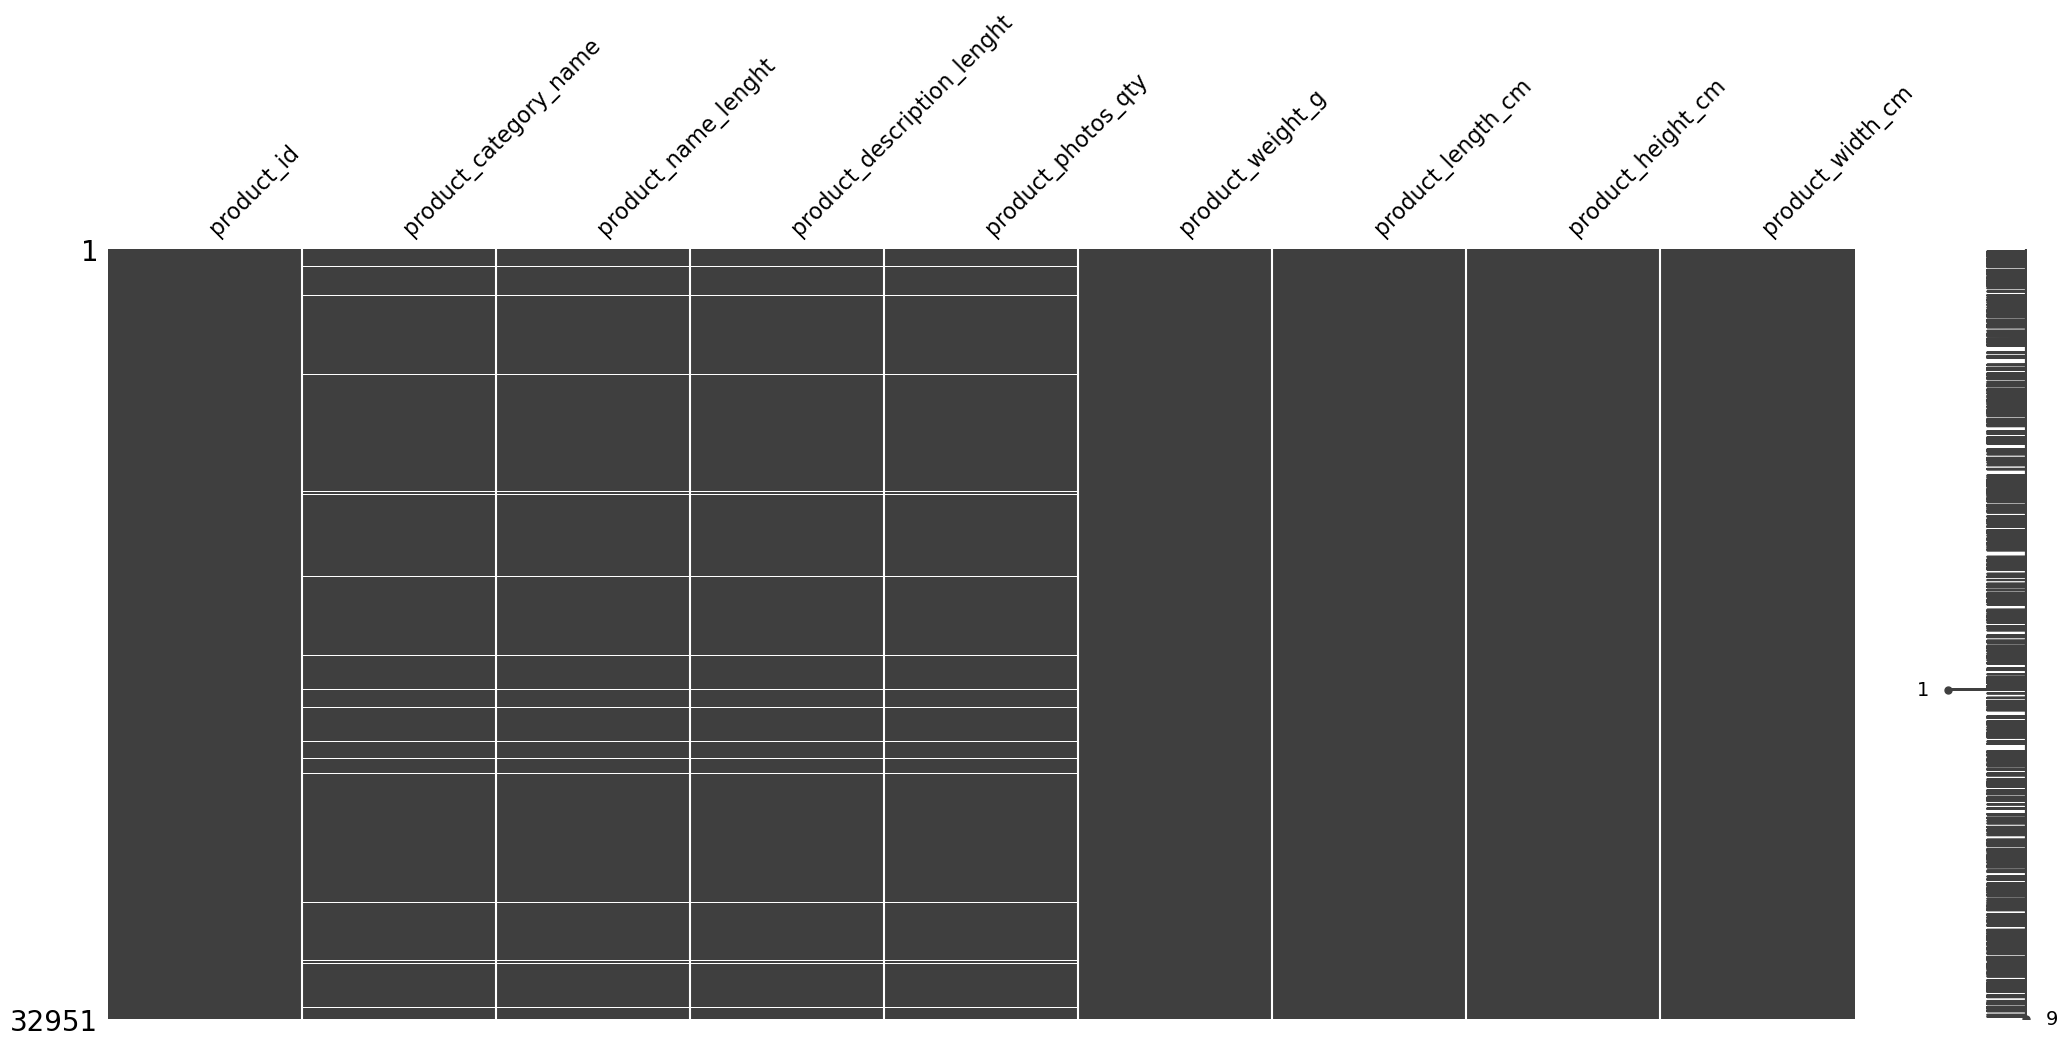

 ****** DATASET : Sellers ******
SHAPE (3095, 4)
INFO <bound method DataFrame.info of                              seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2   

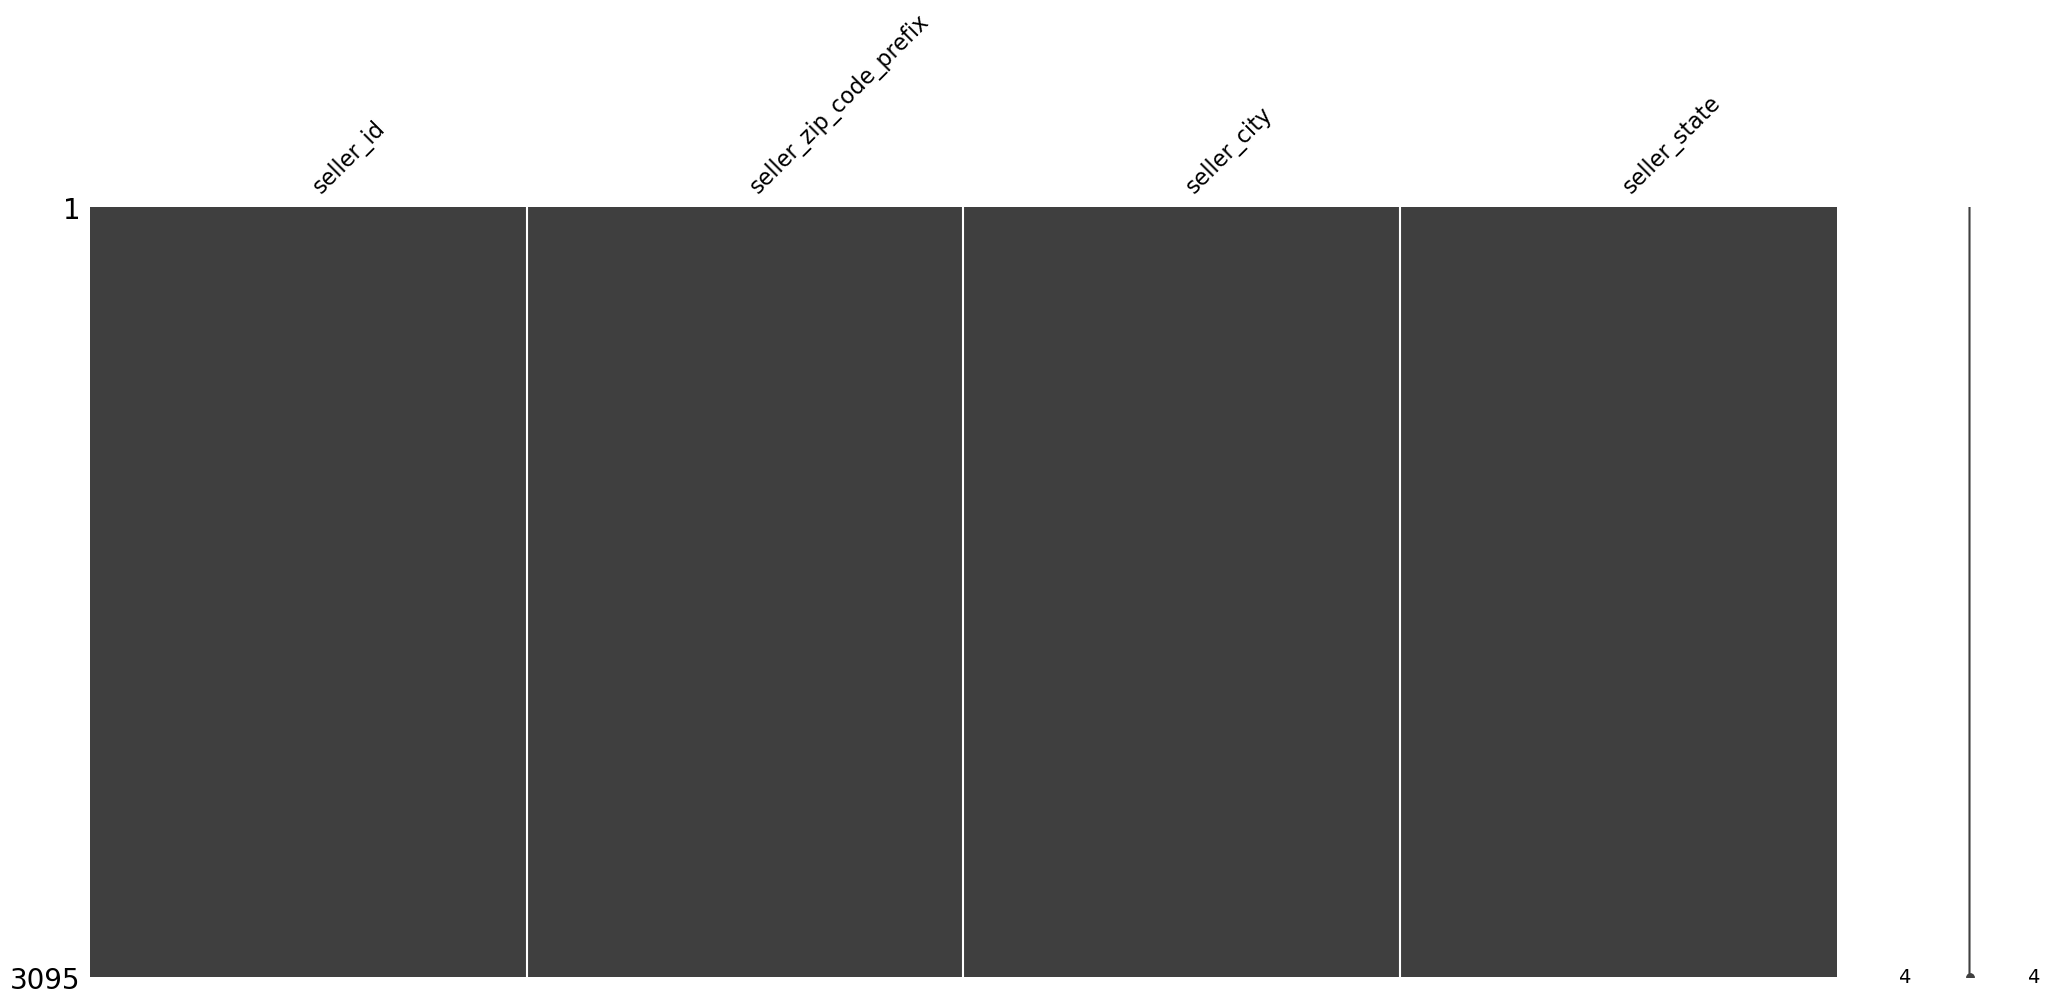

 ****** DATASET : Product Category Name ******
SHAPE (71, 2)
INFO <bound method DataFrame.info of             product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]>
HEAD     product_category_name product_category_name_english
0            beleza_saude                 health_

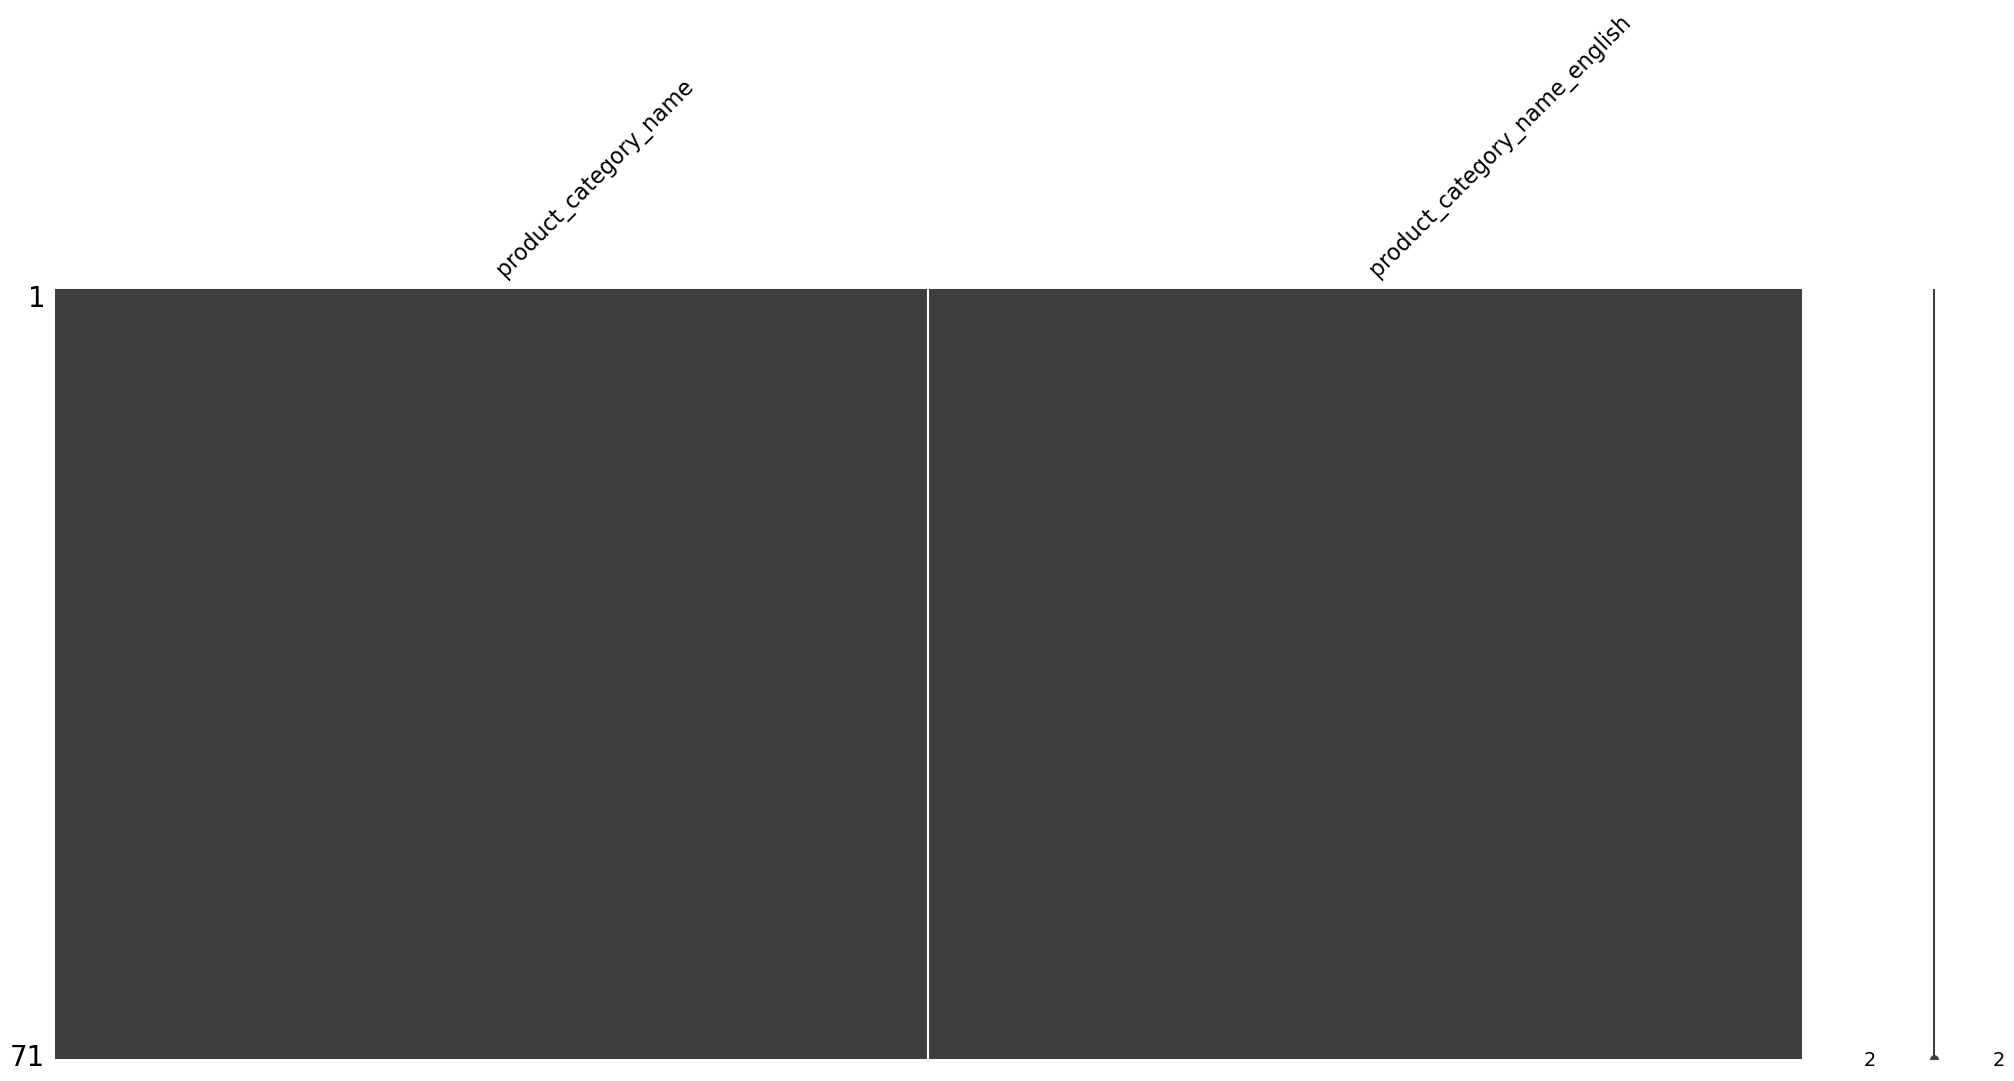

In [6]:
# Boucle pour afficher les graphiques missingno avec le nom du dataset
for dataset_name, dataset in datasets:
    print(f" ****** DATASET : {dataset_name} ******")
    print("SHAPE", dataset.shape)
    print("INFO", dataset.info)
    print("HEAD", dataset.head())
    print(f"Visualisation des données manquantes pour le dataset : {dataset_name}")
    msno.matrix(dataset)
    plt.show()

# Data customers

In [7]:
data_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### On a 5 colonnes qui nous donne 2 id (id et unique_id) par client, le Zip Code, City et State.

In [8]:
# Compter le nombre d'identifiants uniques dans la colonne 'customer_id'
nombre_customer_id_uniques = data_customers['customer_id'].nunique()

# Compter le nombre d'identifiants uniques dans la colonne 'customer_unique_id'
nombre_customer_unique_id_uniques = data_customers['customer_unique_id'].nunique()

# Afficher les résultats
print("Nombre d'identifiants uniques dans 'customer_id' :", nombre_customer_id_uniques)
print("Nombre d'identifiants uniques dans 'customer_unique_id' :", nombre_customer_unique_id_uniques)
print("Nombre total de dimensions :", data_customers.shape)

Nombre d'identifiants uniques dans 'customer_id' : 99441
Nombre d'identifiants uniques dans 'customer_unique_id' : 96096
Nombre total de dimensions : (99441, 5)


# Customer info

In [9]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
data_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Aucune données manquantes dans ce dataframe.

In [11]:
data_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


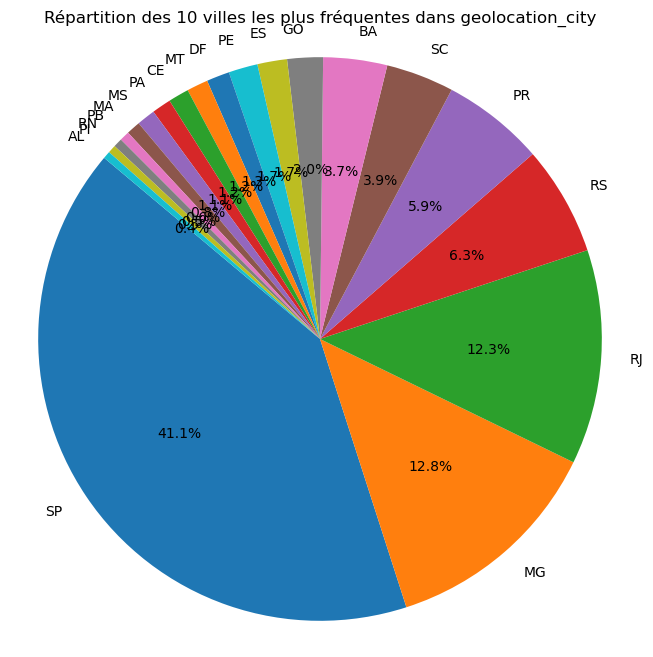

In [12]:
# Compter les occurrences de chaque ville
city_counts = data_geolocation['geolocation_state'].value_counts()

# Sélectionner les 20 villes les plus fréquentes (ou ajustez le nombre si nécessaire)
top_cities = city_counts.head(20)

# Créer un diagramme circulaire pour les 10 villes les plus fréquentes
plt.figure(figsize=(8, 8))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des 10 villes les plus fréquentes dans geolocation_city')
plt.axis('equal')  # Pour que le cercle soit égal

# Afficher le diagramme circulaire
plt.show()

## Ajout feature 'customer_state'

In [13]:
features.append('customer_state')

Données de géolocation si on souhaite effectuer une Map.

In [14]:
import plotly.express as px

In [15]:
# Créer une figure Mapbox avec des couleurs différentes pour chaque état
fig = px.scatter_mapbox(
    data_geolocation,
    lat="geolocation_lat",
    lon="geolocation_lng",
    color="geolocation_state",  # Utiliser la colonne geolocation_state pour définir les couleurs
    hover_name="geolocation_city",
    hover_data=["geolocation_zip_code_prefix", "geolocation_state"],
    zoom=4
)

# Afficher la carte
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Enregistrer la carte dans un fichier HTML
fig.write_html('geolocation_map_states_plotly.html')

# Data Order_items

In [16]:
data_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


* order_id permet de croiser le data order payements
* price permet d'avoir le montant du paiement
* product_id permet d'avoir le type de produit avec la data de products

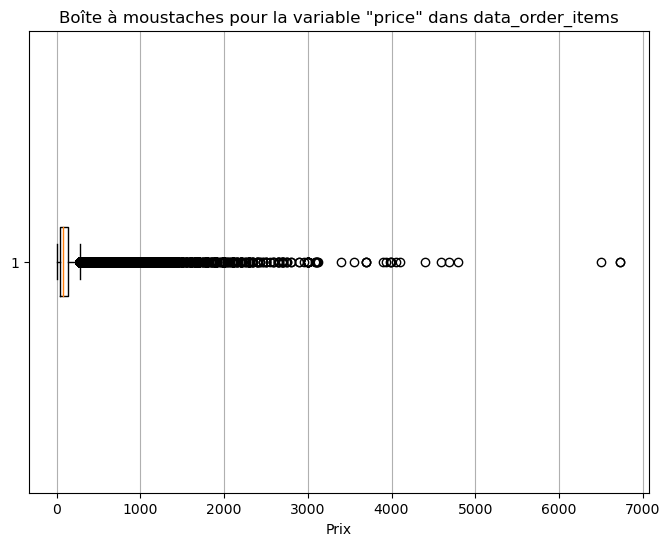

In [17]:
# Sélectionner la colonne 'price' dans le DataFrame
price_data = data_order_items['price']

# Créer un boîte à moustaches pour 'price'
plt.figure(figsize=(8, 6))
plt.boxplot(price_data, vert=False)
plt.title('Boîte à moustaches pour la variable "price" dans data_order_items')
plt.xlabel('Prix')
plt.grid(axis='x')  # Ajouter une grille horizontale
plt.show()

In [18]:
data_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


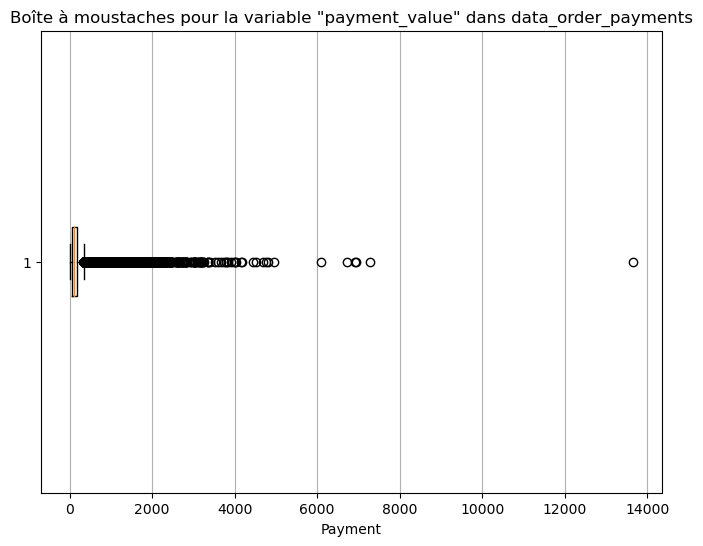

In [19]:
# Sélectionner la colonne 'price' dans le DataFrame
payment_value = data_order_payments['payment_value']

# Créer un boîte à moustaches pour 'price'
plt.figure(figsize=(8, 6))
plt.boxplot(payment_value, vert=False)
plt.title('Boîte à moustaches pour la variable "payment_value" dans data_order_payments')
plt.xlabel('Payment')
plt.grid(axis='x')  # Ajouter une grille horizontale
plt.show()

## Ajout feature payment_value

In [20]:
features.append('payment_value')

In [21]:
data_order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

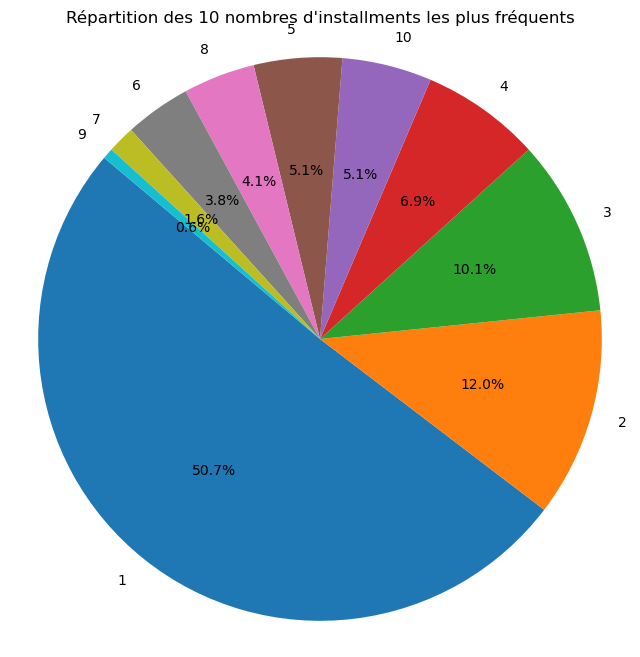

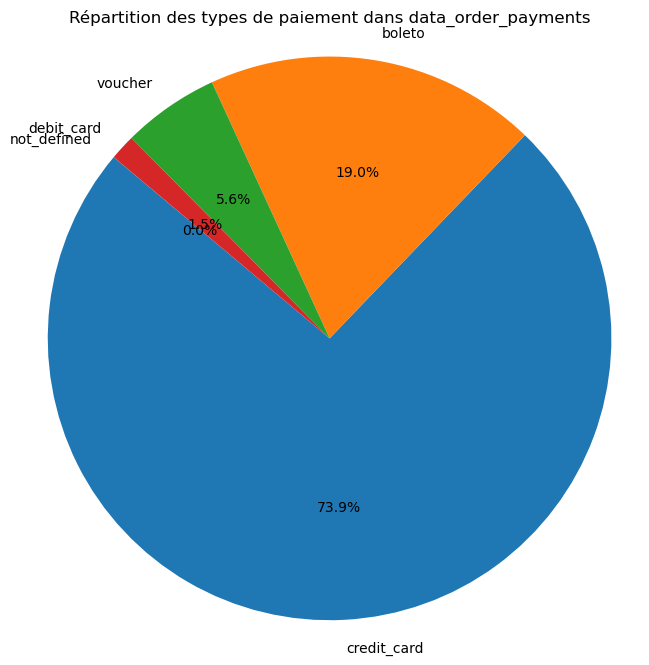

In [22]:
# Compter les occurrences de chaque nombre d'installments
installments_counts = data_order_payments['payment_installments'].value_counts()

# Sélectionner les 10 nombres d'installments les plus fréquents (ou ajustez le nombre si nécessaire)
top_installments = installments_counts.head(10)

# Créer un diagramme circulaire pour les 10 nombres d'installments les plus fréquents
plt.figure(figsize=(8, 8))
plt.pie(top_installments, labels=top_installments.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des 10 nombres d\'installments les plus fréquents')
plt.axis('equal')  # Pour que le cercle soit égal

# Afficher le diagramme circulaire
plt.show()

# Compter les occurrences de chaque type de paiement
payment_type_counts = data_order_payments['payment_type'].value_counts()

# Créer un diagramme circulaire pour les types de paiement
plt.figure(figsize=(8, 8))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des types de paiement dans data_order_payments')
plt.axis('equal')  # Pour que le cercle soit égal

# Afficher le diagramme circulaire
plt.show()

## 50 % des commandes payés en 1 seul fois. L'autre moitié 2 paiements ou plus.

Boleto est un moyen de paiement officiel au Brésil (réglementé par la Banque centrale du Brésil).
Pour finaliser une transaction, les clients reçoivent un coupon qui indique le montant à payer pour les services ou les produits. 

In [23]:
pd.unique(data_order_payments['payment_type'])

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

## Ajout feature payment_type

In [24]:
features.append('payment_type')

In [25]:
data_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


# Data Reviews

In [26]:
data_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


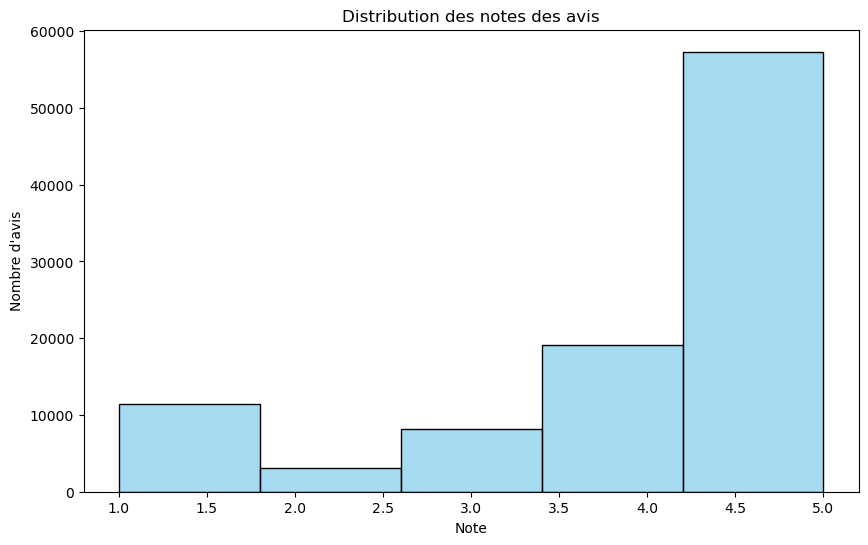

In [27]:
# Sélectionner la colonne 'review_score' dans le dataset
review_scores = data_order_reviews['review_score']

# Tracer un histogramme
plt.figure(figsize=(10, 6))
sns.histplot(review_scores, bins=5, kde=False, color='skyblue')
plt.title('Distribution des notes des avis')
plt.xlabel('Note')
plt.ylabel('Nombre d\'avis')
plt.show()

## Ajout feature 'review_score'

In [28]:
features.append('review_score')

# Data Orders

In [29]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [30]:
data_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

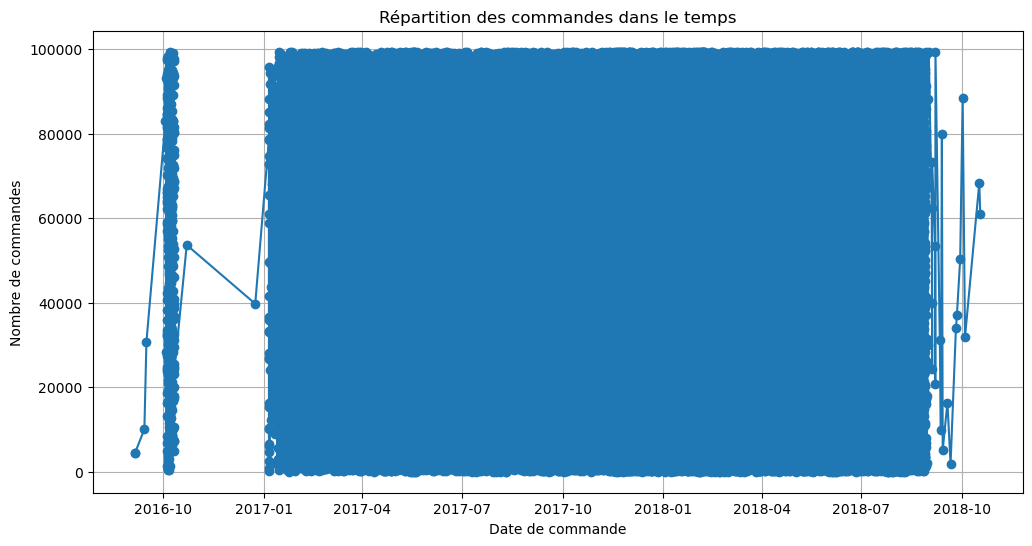

In [31]:
# Convertissez la colonne 'order_purchase_timestamp' en format de date
data_orders['order_purchase_timestamp'] = pd.to_datetime(data_orders['order_purchase_timestamp'])

# Triez le DataFrame par 'order_purchase_timestamp'
data_orders = data_orders.sort_values(by='order_purchase_timestamp')

# Créez un graphique de lignes pour visualiser la répartition des commandes dans le temps
plt.figure(figsize=(12, 6))
plt.plot(data_orders['order_purchase_timestamp'], data_orders.index, marker='o', linestyle='-')
plt.title('Répartition des commandes dans le temps')
plt.xlabel('Date de commande')
plt.ylabel('Nombre de commandes')
plt.grid(True)
plt.show()

In [32]:
# Convertir la colonne 'order_purchase_timestamp' en format de date
data_orders['order_purchase_timestamp'] = pd.to_datetime(data_orders['order_purchase_timestamp'])

# Trouver la première et la dernière date de commande
min_date = data_orders['order_purchase_timestamp'].min()
max_date = data_orders['order_purchase_timestamp'].max()

# Afficher les résultats
print("Première date de commande :", min_date)
print("Dernière date de commande :", max_date)

Première date de commande : 2016-09-04 21:15:19
Dernière date de commande : 2018-10-17 17:30:18


In [33]:
# Convertir les colonnes de dates en format datetime
data_orders['order_delivered_customer_date'] = pd.to_datetime(data_orders['order_delivered_customer_date'])
data_orders['order_estimated_delivery_date'] = pd.to_datetime(data_orders['order_estimated_delivery_date'])

# Créer la nouvelle colonne basée sur les conditions
data_orders['delivery_status'] = pd.NA
data_orders.loc[data_orders['order_delivered_customer_date'].isna(), 'delivery_status'] = 'Unknown'
data_orders.loc[data_orders['order_delivered_customer_date'] > data_orders['order_estimated_delivery_date'], 'delivery_status'] = 'Delayed'
data_orders.loc[data_orders['order_delivered_customer_date'] < data_orders['order_estimated_delivery_date'], 'delivery_status'] = 'Respected'

# Afficher le DataFrame avec la nouvelle colonne
print(data_orders[['order_delivered_customer_date', 'order_estimated_delivery_date', 'delivery_status']])

      order_delivered_customer_date order_estimated_delivery_date  \
4541                            NaT                    2016-10-20   
4396                            NaT                    2016-10-28   
10071                           NaT                    2016-09-30   
30710           2016-11-09 07:47:38                    2016-10-04   
83078                           NaT                    2016-10-25   
...                             ...                           ...   
50387                           NaT                    2018-10-15   
88500                           NaT                    2018-10-23   
31891                           NaT                    2018-10-16   
68373                           NaT                    2018-11-12   
60938                           NaT                    2018-10-30   

      delivery_status  
4541          Unknown  
4396          Unknown  
10071         Unknown  
30710         Delayed  
83078         Unknown  
...               ...  
503

In [34]:
# Convertir les colonnes de dates en format datetime
data_orders['order_delivered_customer_date'] = pd.to_datetime(data_orders['order_delivered_customer_date'])
data_orders['order_estimated_delivery_date'] = pd.to_datetime(data_orders['order_estimated_delivery_date'])

# Créer la nouvelle colonne 'delivery_delay'
data_orders['delivery_delay'] = np.nan

# Calculer la différence de jours entre les dates
data_orders['delivery_delay'] = (data_orders['order_delivered_customer_date'] - data_orders['order_estimated_delivery_date']).dt.days

# Remplacer les valeurs NaN par 0
data_orders['delivery_delay'].fillna(0, inplace=True)

# Afficher le DataFrame avec la nouvelle colonne
print(data_orders[['order_delivered_customer_date', 'order_estimated_delivery_date', 'delivery_status', 'delivery_delay']])

      order_delivered_customer_date order_estimated_delivery_date  \
4541                            NaT                    2016-10-20   
4396                            NaT                    2016-10-28   
10071                           NaT                    2016-09-30   
30710           2016-11-09 07:47:38                    2016-10-04   
83078                           NaT                    2016-10-25   
...                             ...                           ...   
50387                           NaT                    2018-10-15   
88500                           NaT                    2018-10-23   
31891                           NaT                    2018-10-16   
68373                           NaT                    2018-11-12   
60938                           NaT                    2018-10-30   

      delivery_status  delivery_delay  
4541          Unknown             0.0  
4396          Unknown             0.0  
10071         Unknown             0.0  
30710      

In [35]:
data_orders['delivery_delay'].describe()

count    99441.000000
mean       -11.522752
std         10.232259
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64

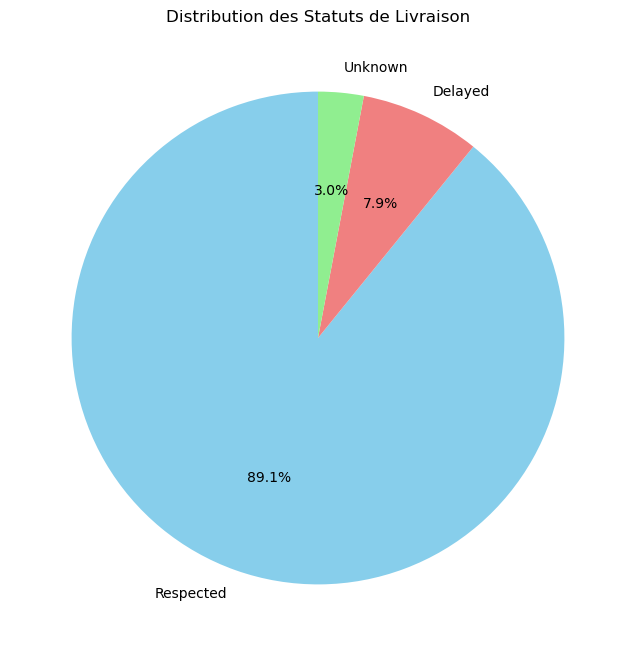

In [36]:
# Compter le nombre de chaque catégorie dans la colonne 'delivery_status'
delivery_status_counts = data_orders['delivery_status'].value_counts()

# Tracé du pie chart
plt.figure(figsize=(8, 8))
plt.pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution des Statuts de Livraison')
plt.show()

In [37]:
data_orders['order_status'].unique()

array(['shipped', 'canceled', 'delivered', 'invoiced', 'unavailable',
       'processing', 'approved', 'created'], dtype=object)

## Statut de commande

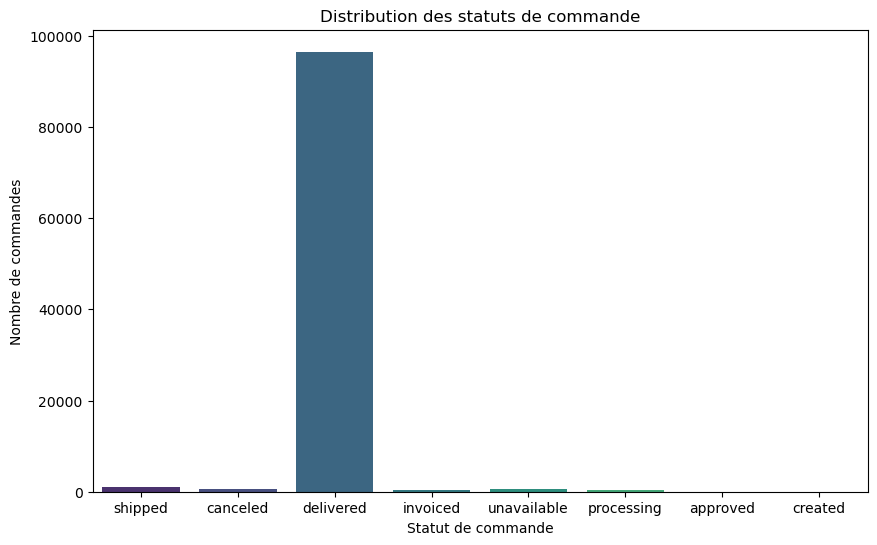

In [38]:
# Tracer un diagramme à barres pour la colonne 'order_status'
plt.figure(figsize=(10, 6))
sns.countplot(data=data_orders, x='order_status', palette='viridis')
plt.title('Distribution des statuts de commande')
plt.xlabel('Statut de commande')
plt.ylabel('Nombre de commandes')
plt.show()

# Data Products

In [39]:
data_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


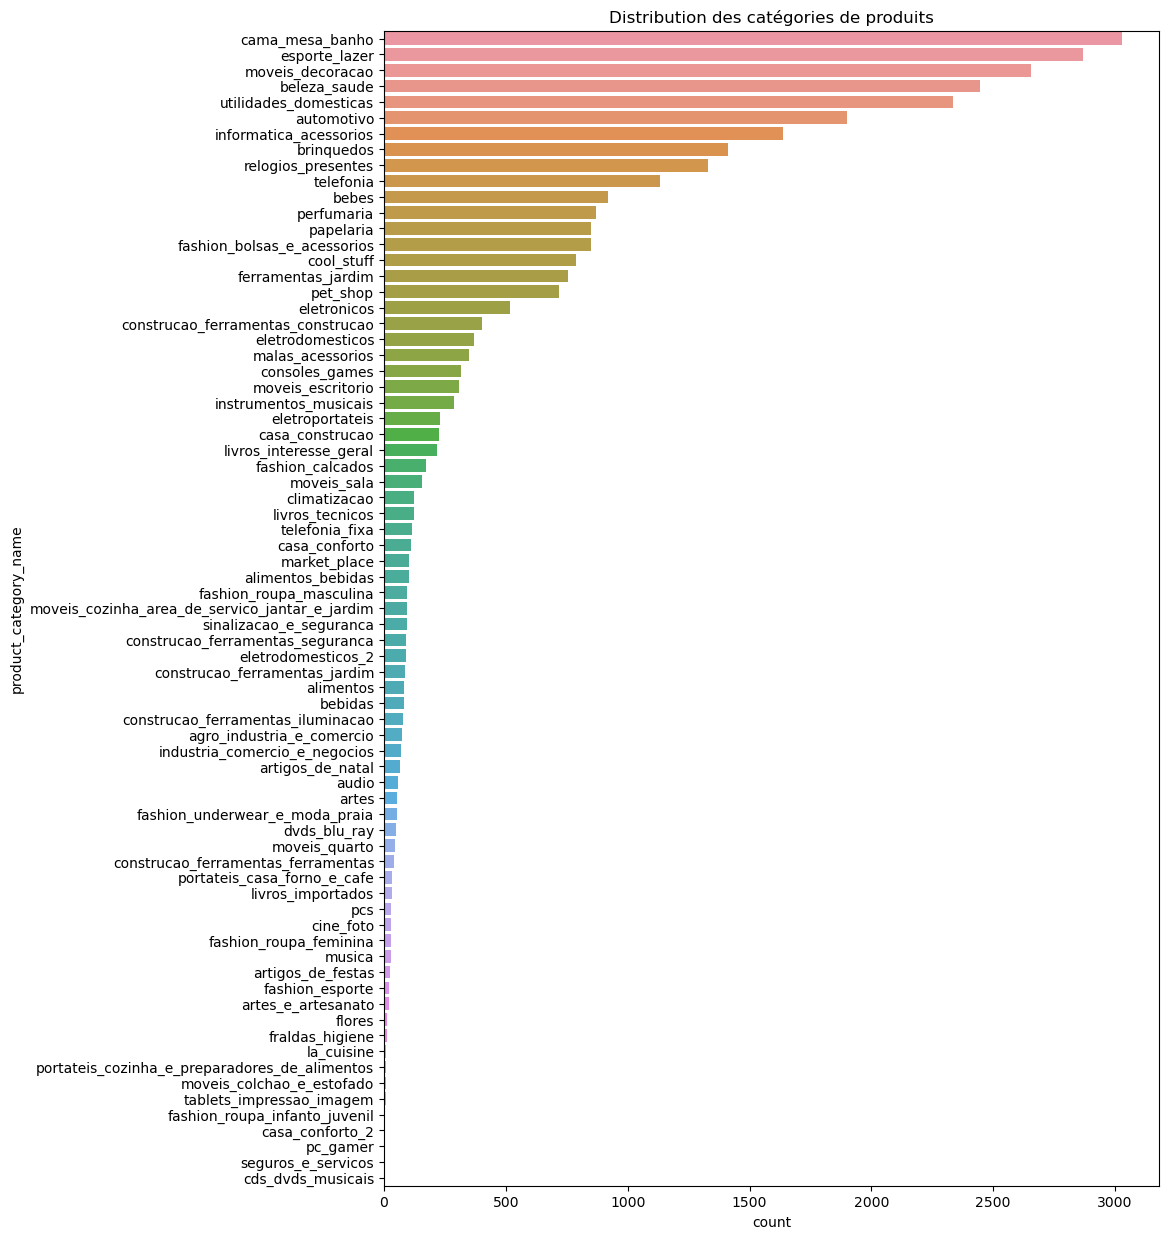

In [40]:
# Par exemple, visualiser la distribution des catégories de produits
plt.figure(figsize=(10, 15))
sns.countplot(y='product_category_name', data=data_products, order=data_products['product_category_name'].value_counts().index)
plt.title('Distribution des catégories de produits')
plt.show()

# Data Sellers

In [41]:
data_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [42]:
data_product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Merges

In [43]:
# Merge orders et payments

merged_data = pd.merge(data_order_payments, data_orders, on='order_id')
merged_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,delivery_delay
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,Respected,-13.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,Respected,-17.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,Respected,-17.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,Respected,-14.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,Respected,-12.0


In [44]:
# Merge du merged avec custumers 

merged_data = pd.merge(merged_data, data_customers, on="customer_id")
merged_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status,delivery_delay,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,Respected,-13.0,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,Respected,-17.0,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,Respected,-17.0,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,Respected,-14.0,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,Respected,-12.0,4291db0da71914754618cd789aebcd56,18570,conchas,SP


In [45]:
merged_data = pd.merge(merged_data,data_order_reviews, on= "order_id" )

In [46]:
merged_data.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_status', 'delivery_delay',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

# Chiffres d'affaires total sur le data set 

In [47]:
# Filtrer les commandes non annulées
valid_orders = merged_data[merged_data['order_status'] != 'canceled']

# Calculer le chiffre d'affaires total
total_revenue = valid_orders['payment_value'].sum()

# Afficher le résultat
print("Chiffre d'affaires total (en excluant les commandes annulées) :", total_revenue)

Chiffre d'affaires total (en excluant les commandes annulées) : 15793024.360000001


# Ajout des colonnes total payment , review_score moyenne, nombre total de commandes, average payment_installments

In [48]:
# 1. Créer une colonne pour le montant total des paiements
total_payment = merged_data.groupby('customer_id')['payment_value'].sum().reset_index()
merged_data = pd.merge(merged_data, total_payment, on='customer_id', how='left')
merged_data.rename(columns={'payment_value_y': 'total_payment_value'}, inplace=True)

# 2. Créer une colonne pour la moyenne du 'review_score'
average_review = merged_data.groupby('customer_id')['review_score'].mean().reset_index()
merged_data = pd.merge(merged_data, average_review, on='customer_id', how='left')
merged_data.rename(columns={'review_score_y': 'average_review_score'}, inplace=True)

# 3. Créer une colonne pour le nombre total de commandes
total_orders = merged_data.groupby('customer_id')['order_id'].count().reset_index()
merged_data = pd.merge(merged_data, total_orders, on='customer_id', how='left')
merged_data.rename(columns={'order_id_y': 'total_number_of_orders'}, inplace=True)

# 4. Créer une colonne pour la moyenne de 'payment_installments'
average_installments = merged_data.groupby('customer_id')['payment_installments'].mean().reset_index()
merged_data = pd.merge(merged_data, average_installments, on='customer_id', how='left')
merged_data.rename(columns={'payment_installments_y': 'average_payment_installments'}, inplace=True)

In [49]:
merged_data.columns

Index(['order_id_x', 'payment_sequential', 'payment_type',
       'payment_installments_x', 'payment_value_x', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_status', 'delivery_delay',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score_x', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'total_payment_value',
       'average_review_score', 'total_number_of_orders',
       'average_payment_installments'],
      dtype='object')

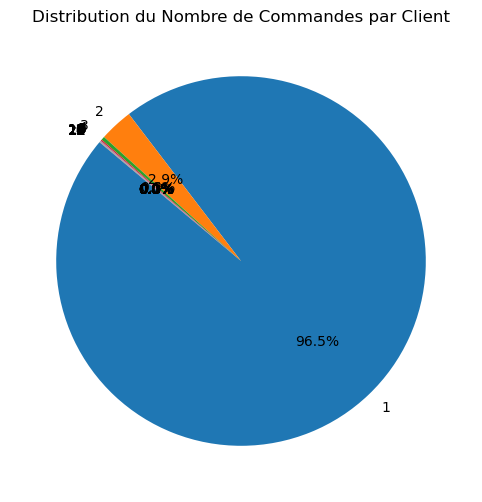

In [50]:
# Créer un DataFrame regroupé par 'customer_id' avec le total des commandes
total_orders = merged_data.groupby('customer_id')['order_id_x'].count().reset_index()

# Compter le nombre de clients qui ont commandé un certain nombre de fois
orders_count = total_orders['order_id_x'].value_counts().reset_index()

# Renommer les colonnes pour plus de clarté
orders_count.columns = ['Number of Orders', 'Number of Customers']

# Trier par le nombre de commandes
orders_count = orders_count.sort_values(by='Number of Orders')

# Afficher le pie chart
plt.figure(figsize=(10, 6))
plt.pie(orders_count['Number of Customers'], labels=orders_count['Number of Orders'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution du Nombre de Commandes par Client')
plt.show()

In [51]:
orders_count

,Number of Orders,Number of Customers
0,1,95206
1,2,2878
2,3,299
3,4,116
4,5,50
5,6,39
6,7,28
7,8,11
8,9,9
11,10,6


In [52]:
# Calculer la récence
max_purchase_date = merged_data['order_purchase_timestamp'].max()
merged_data['recency'] = (max_purchase_date - merged_data['order_purchase_timestamp']).dt.days

# Calculer la fréquence
frequency_df = merged_data.groupby('customer_id')['order_id_x'].count().reset_index()
frequency_df.columns = ['customer_id', 'frequency']

# Calculer le montant
monetary_df = merged_data.groupby('customer_id')['payment_value_x'].sum().reset_index()
monetary_df.columns = ['customer_id', 'monetary']

# Calculer la moyenne de la colonne 'average_review_score'
average_review_score_df = merged_data.groupby('customer_id')['average_review_score'].mean().reset_index()
average_review_score_df.columns = ['customer_id', 'average_review_score']

# Fusionner les DataFrames
rfm_df = pd.merge(frequency_df, monetary_df, on='customer_id')
rfm_df = pd.merge(rfm_df, merged_data[['customer_id', 'recency', 'delivery_delay', 'average_payment_installments','order_purchase_timestamp']], on='customer_id')
rfm_df = pd.merge(rfm_df, average_review_score_df, on='customer_id')

# Afficher le DataFrame RFM
print(rfm_df)

                             customer_id  frequency  monetary  recency  \
0       00012a2ce6f8dcda20d059ce98491703          1    114.74      337   
1       000161a058600d5901f007fab4c27140          1     67.41      458   
2       0001fd6190edaaf884bcaf3d49edf079          1    195.42      596   
3       0002414f95344307404f0ace7a26f1d5          1    179.35      427   
4       000379cdec625522490c315e70c7a9fb          1    107.01      198   
...                                  ...        ...       ...      ...   
103672  fffecc9f79fd8c764f843e9951b11341          3     81.36      202   
103673  fffeda5b6d849fbd39689bb92087f431          1     63.13      148   
103674  ffff42319e9b2d713724ae527742af25          1    214.13      126   
103675  ffffa3172527f765de70084a7e53aae8          1     45.50      410   
103676  ffffe8b65bbe3087b653a978c870db99          1     18.37      383   

        delivery_delay  average_payment_installments order_purchase_timestamp  \
0                 -6.0        

# Sauvegarde de la data à utiliser

In [53]:
merged_data.to_csv('data_after_aed.csv')

# Enregistre la liste features dans un fichier avec pickle
with open('features_list.pkl', 'wb') as file:
    pickle.dump(features, file)

In [54]:
rfm_df.to_csv('rfm_df.csv')

# Enregistre la liste features dans un fichier avec pickle
with open('features_list.pkl', 'wb') as file:
    pickle.dump(features, file)